# Feature Engineering

This notebook covers the selection of the most important features for the Wisconsin Breast Cancer dataset.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Get the current notebook's directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct the path to the scripts directory
utils_dir = os.path.join(current_dir, '..', 'scripts')

# Add the utils directory to the system path
sys.path.append(utils_dir)

#Load functions from the script features.py
from features import load_preprocessed_data, select_features, plot_feature_importance, select_features_anova, plot_feature_importance_anova

# Set plot style
sns.set(style='whitegrid')

## Load the Preprocessed Dataset

In [23]:
# Load the preprocessed dataset
filepath = '../data/preprocessed_data.npz'
X_train, X_test, y_train, y_test, feature_names = load_preprocessed_data(filepath)
print('Features:')
feature_names

Features:


array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

## PLS Regression for Feature Selection

Optimal number of components: 3
Number of coefficients: 14
Number of selected features: 14


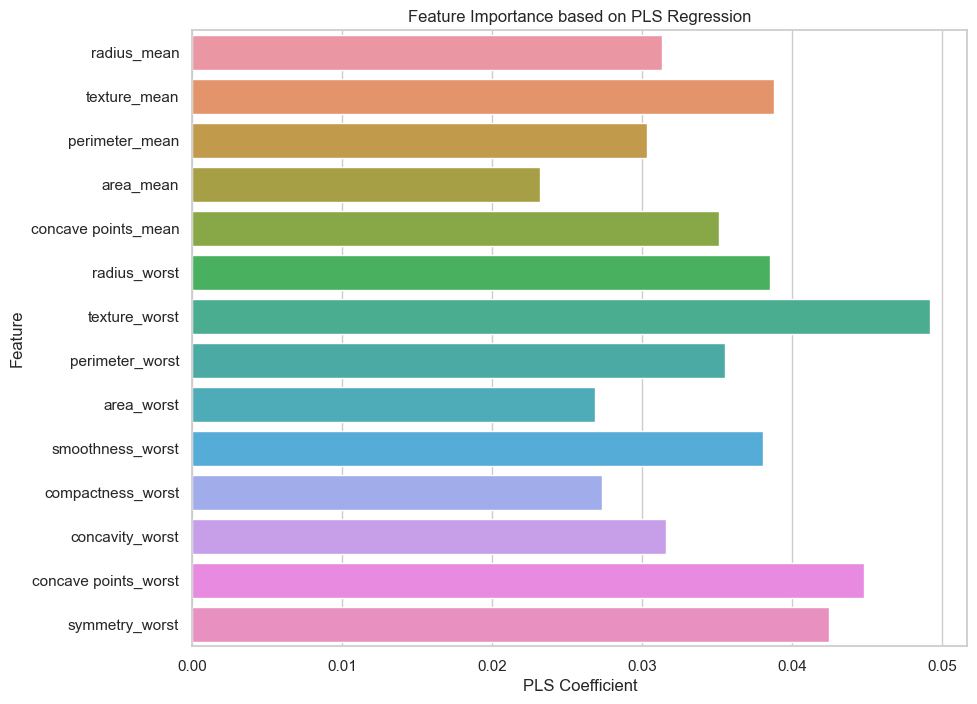

In [16]:
# Select features using PLS regression
X_train_selected, X_test_selected, selected_features_mask, pls = select_features (X_train, y_train, X_test)
plot_feature_importance (pls, selected_features_mask, feature_names)


## ANOVA F-test for Feature Selection

Number of scores: 30
Number of selected features: 30


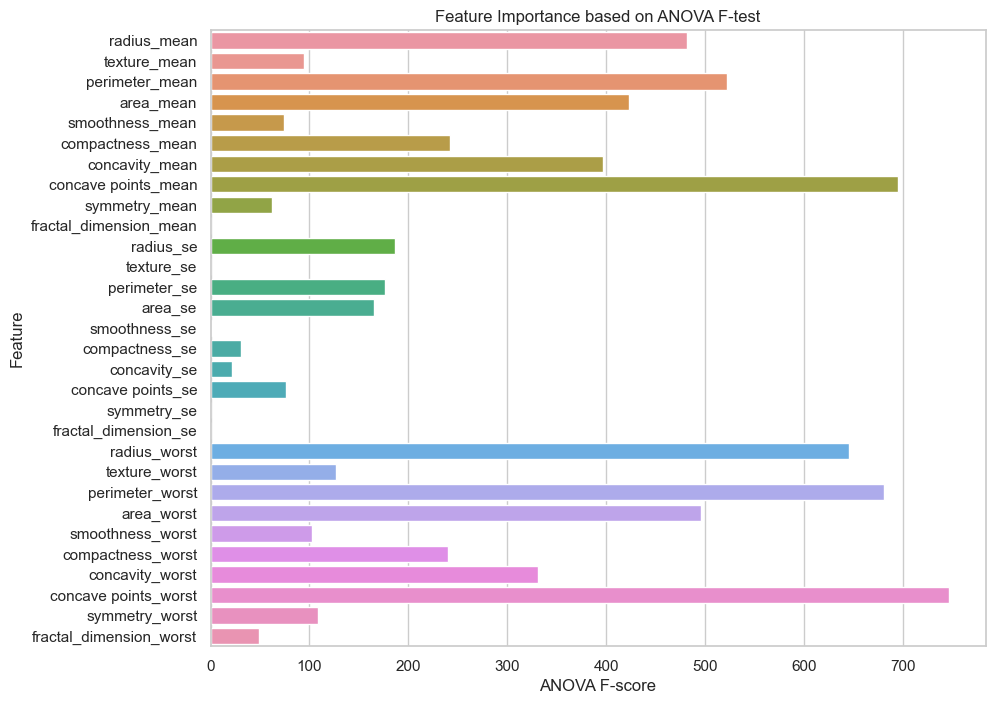

In [17]:
# Select features using ANOVA
X_train_selected, X_test_selected, selected_features_mask, selector = select_features_anova(X_train, y_train, X_test, k=30)
plot_feature_importance_anova(selector, selected_features_mask, feature_names)

## Save the Selected Features

In [18]:
# Save the most important selected features 
X_train_selected, X_test_selected, selected_features_mask, selector = select_features_anova(X_train, y_train, X_test, k=20)
np.savez('../data/selected_features_data.npz', X_train=X_train_selected, X_test=X_test_selected, y_train=y_train, y_test=y_test, selected_features=feature_names[selected_features_mask])

## Summary

In this notebook, we have performed feature selection using Partial Least Squares (PLS) regression and ANOVA F-test, visualized the importance of the selected features, and saved the selected features data for model training. The results did not differ significantly from using either technique.